In [2]:
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
filenames = glob('Combined_*[a,b,c,d,e,f,g,h,i,j,k]*160c.dta')
list_dfs  = [pd.read_stata(f) for f in filenames]

In [99]:
list_desired_index = [list_dfs[i].filter(regex='jbtprhr$').columns for i in range(11)]
list_desired = [list_dfs[i][list_desired_index[i]] for i in range(11)]

list_actual_index = [list_dfs[i].filter(regex='jbhruc$').columns for i in range(11)]
list_actual = [list_dfs[i][list_actual_index[i]] for i in range(11)]

list_sex_index = [list_dfs[i].filter(regex='hgsex$').columns for i in range(11)] #Finds the index for sex in each dataset
list_sex = [list_dfs[i][list_sex_index[i]] for i in range(11)] #waves_sex[0-10] are now created (waves1-11)

list_employed_index = [list_dfs[i].filter(regex='esbrd$').columns for i in range(11)]
list_employed = [list_dfs[i][list_employed_index[i]] for i in range(11)]

list_jbhr_index = [list_dfs[i].filter(regex='jbhrcpr$').columns for i in range(11)] #This finds the index for the string 'jbhrcpr' in all waves
list_jbhr = [list_dfs[i][list_jbhr_index[i]] for i in range(11)] #waves_jbhr[0-10] are now created (waves1-11)
              
lists_join = [list_sex[i].join([list_desired[i],list_actual[i], list_employed[i], list_jbhr[i]]) for i in range(11)]

In [100]:
Employed = [lists_join[i].iloc[:,3] == '[1] Employed' for i in range(11)]
waves_excluded = [lists_join[i][(Employed[i])] for i in range(11)]
waves_excluded = [waves_excluded[i][waves_excluded[i].iloc[:,0] == '[2] Female'] for i in range(11)]

male = [waves_excluded[i].iloc[:,0].name for i in range(11)]
employed = [waves_excluded[i].iloc[:,3].name for i in range(11)]
male_employed = [waves_excluded[i].drop(columns = [male[i], employed[i]]) for i in range(11)]

In [101]:
male_employed[0].columns = ['Desired', 'Actual', 'Preference']
# male_employed[i] = desired.. for i in range(11)
male_employed_pref = [male_employed[i][(male_employed[i].iloc[:,2] == '[3] More hours') | (male_employed[i].iloc[:,2] == '[1] Fewer hours')] for i in range(11)]

In [102]:
col1_to_numeric = [pd.to_numeric(male_employed_pref[i].iloc[:,0], errors='coerce') for i in range(11)]
col2_to_numeric = [pd.to_numeric(male_employed_pref[i].iloc[:,1], errors='coerce') for i in range(11)]
big_table = [pd.concat([male_employed_pref[i], col1_to_numeric[i]], axis=1) for i in range(11)]
big_table = [pd.concat([big_table[i], col2_to_numeric[i]], axis=1) for i in range(11)]

In [103]:
desired = [big_table[i].iloc[:,-2] for i in range(11)]
actual = [big_table[i].iloc[:,-1] for i in range(11)]
fewer_hours = [big_table[i][big_table[i].iloc[:,2] == '[1] Fewer hours'] for i in range(11)]
more_hours = [big_table[i][big_table[i].iloc[:,2] == '[3] More hours'] for i in range(11)]

In [104]:
desired = [fewer_hours[i].iloc[:,-2].sum()/(len(fewer_hours[i])) for i in range(11)]
actual = [fewer_hours[i].iloc[:,-1].sum()/(len(fewer_hours[i])) for i in range(11)]
wk_less_hrs = [desired[i] - actual[i] for i in range(11)]
tot_fewer_hrs = [len(fewer_hours[i]) for i in range(11)]

In [105]:
desired = [more_hours[i].iloc[:,-2].sum()/(len(more_hours[i])) for i in range(11)]
actual = [more_hours[i].iloc[:,-1].sum()/(len(more_hours[i])) for i in range(11)]
wk_more_hrs = [desired[i] - actual[i] for i in range(11)]
tot_more_hrs = [len(more_hours[i]) for i in range(11)]

In [106]:
desired = [big_table[i].iloc[:,-2].sum()/(len(big_table[i])) for i in range(11)]
actual = [big_table[i].iloc[:,-1].sum()/(len(big_table[i])) for i in range(11)]
wk_total= [desired[i] - actual[i] for i in range(11)]
tot_hrs = [len(big_table[i]) for i in range(11)]

In [107]:
work_less = pd.DataFrame(wk_less_hrs, tot_fewer_hrs).reset_index()
work_more = pd.DataFrame(wk_more_hrs, tot_more_hrs).reset_index()
work_total = pd.DataFrame(wk_total, tot_hrs).reset_index()

In [159]:
work_less.columns = (['Num_workers_less', 'Avg_hours_less'] )
work_more.columns = (['Num_workers_more', 'Avg_hours_more'] )
work_total.columns = (['Num_workers_total', ' Avg_hours_total'] )

In [160]:
table_5 = work_less.join(work_more).join(work_total)
table_5.index += 1
table_5

,Num_workers_less,Avg_hours_less,Num_workers_more,Avg_hours_more,Num_workers_total,Avg_hours_total
1,1061,-13.290292,685,11.630657,1746,-3.513173
2,926,-13.208423,664,11.846386,1590,-2.745283
3,945,-13.304762,650,11.460000,1595,-3.212539
4,951,-13.054679,598,11.289298,1549,-3.656553
5,1035,-13.265700,668,10.991018,1703,-3.751028
6,1046,-12.839388,612,10.668301,1658,-4.162244
7,1075,-13.302326,619,10.605816,1694,-4.566116
8,1015,-13.042365,586,11.136519,1601,-4.192380
9,974,-13.155031,644,10.673913,1618,-3.670581
10,1018,-13.185658,697,10.784792,1715,-3.443732


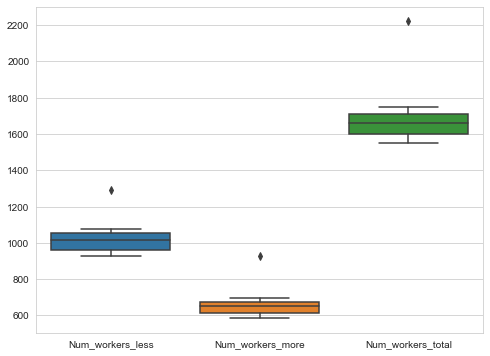

In [173]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.boxplot(data=(table_5.iloc[:,::2]))
